# Introduction

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

In [16]:
import pandas as pd


# df = pd.read_csv('vehicles.csv')

# df.columns

# Data Cleaning & Preprocessing

In [19]:
# df_cleaned = df

# Trainning & Fitting Machine Learning Models

## 1. Linear Regression Model: Ridge Regression

### Rationale of Selection

- Ridge Regression adds an L2 penalty to the loss function. This shrinks coefficients but generally keeps all features in the model.
- Lasso (L1 penalty) tends to zero out coefficients of less important features, effectively performing feature selection. This can be useful in some scenarios, but it can also drop too many correlated features and become unstable if you want to leverage those correlations.
- In real-world used-car datasets, you may have correlated features (e.g., year and odometer, or manufacturer and model). Ridge handles multicollinearity more gracefully—rather than arbitrarily zeroing out correlated features, it shrinks them equally. This usually yields more stable results.
- Elastic Net (a mix of L1 and L2) is also a possibility, but if you don’t specifically need feature selection from Lasso, Ridge is a solid, simpler choice

### Strengths
- Very fast to train on large tabular data.
- Interpretability: You can easily examine which features have higher coefficients.
- Good baseline to quickly gauge your data’s linear separability.

### Weaknesses
- Struggles with non-linear relationships unless you manually engineer polynomial or interaction terms.
- May still underfit if the real relationship between features and price is complex.

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

In [23]:
# Load the dataset
file_path = "/Users/arielzhang/Documents/MSDS422/cleaned_vehicles.csv"  # Update the path if needed
df = pd.read_csv(file_path)

In [25]:
# Drop irrelevant columns
drop_cols = ["id", "url", "region_url", "image_url", "description", "VIN", "posting_date"]
df = df.drop(columns=drop_cols)

# One-Hot Encode categorical features
categorical_features = ["region", "condition", "title_status", "cylinders", "state"]
# Apply Ordinal Encoding
encoder = OrdinalEncoder()
df[categorical_features] = encoder.fit_transform(df[categorical_features])
df.head

<bound method NDFrame.head of        region  price    year  manufacturer  model  condition  cylinders  fuel  \
0        16.0  27990  2012.0            14   6285        2.0        6.0     2   
1        16.0  34590  2016.0             7   6357        2.0        5.0     2   
2        16.0  29990  2016.0             7   2328        2.0        5.0     2   
3        16.0  38590  2011.0             7   2442        2.0        6.0     2   
4        16.0  32990  2017.0            20   7499        2.0        5.0     2   
...       ...    ...     ...           ...    ...        ...        ...   ...   
67636   393.0  25590  2017.0            13    969        2.0        5.0     2   
67637   393.0  32990  2016.0            18   5688        2.0        6.0     2   
67638   393.0  33590  2018.0            23   4261        2.0        5.0     2   
67639   393.0  23590  2019.0            30   4908        2.0        5.0     2   
67640   393.0  28990  2018.0            23   3088        2.0        5.0     2  

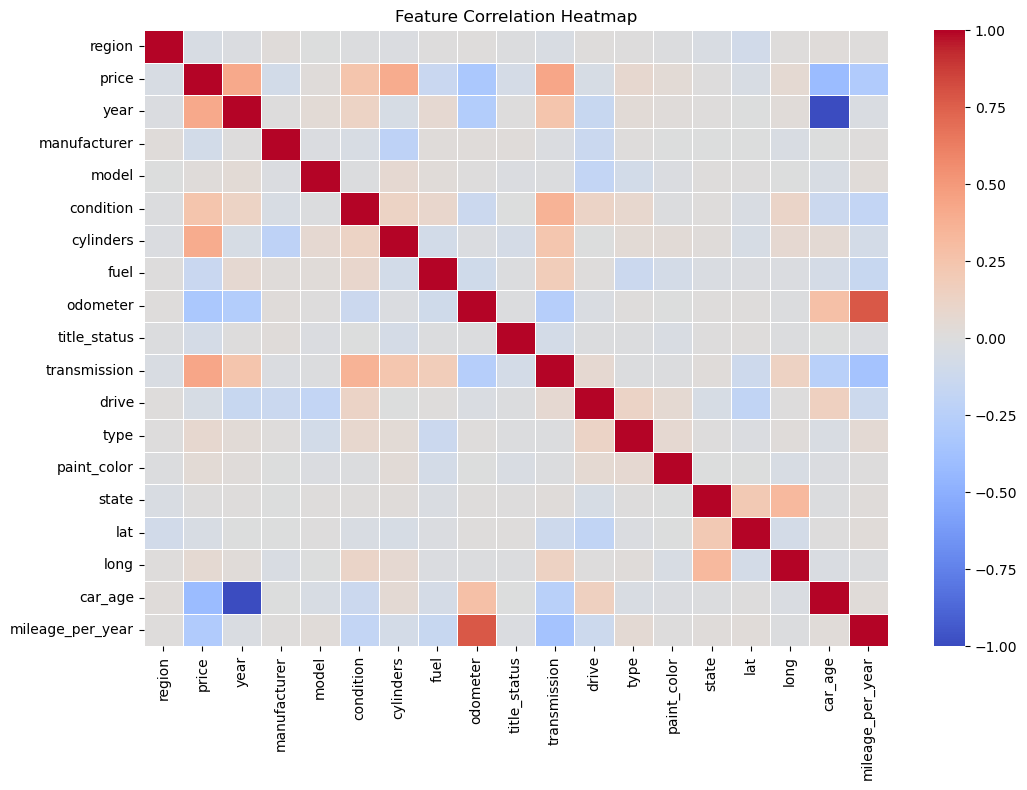

In [27]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [29]:
drop_features = ["lat", "long", "state", "paint_color", "drive"]
df = df.drop(columns=drop_features, errors="ignore")

In [31]:
df = df.drop(columns=["year"], errors="ignore")

In [33]:
# Define target and features
target = "price"
X = df.drop(columns=[target])
y = df[target]

In [35]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
from sklearn.linear_model import RidgeCV
alphas = np.logspace(-2, 3, 10)
ridge_cv = RidgeCV(alphas=alphas)
ridge_cv.fit(X_train, y_train)
print(f"Best alpha: {ridge_cv.alpha_}")

Best alpha: 278.2559402207126


In [45]:
# Train Ridge Regression model
ridge = Ridge(alpha=278.2559402207126)
ridge.fit(X_train, y_train)

Ridge(alpha=278.2559402207126)

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Predictions
y_pred = ridge.predict(X_test)

# Evaluation Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.4f}")

Root Mean Squared Error (RMSE): 9639.78
Mean Absolute Error (MAE): 6659.89
R-squared (R²): 0.5004


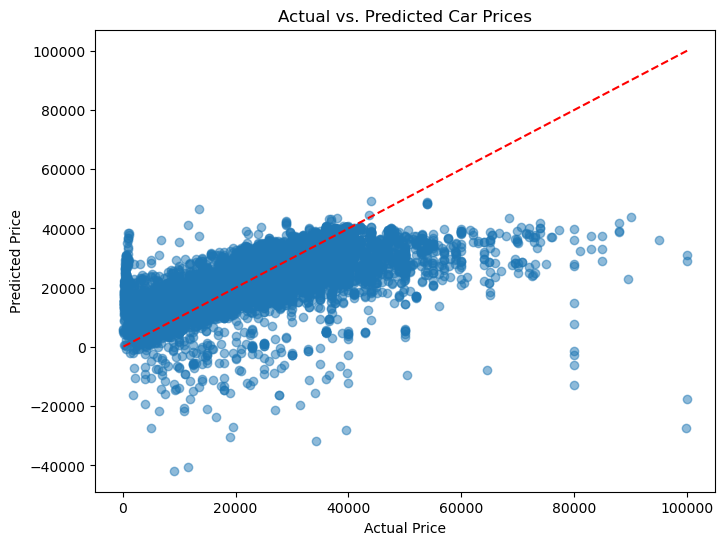

In [49]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Car Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")  # Identity line
plt.show()


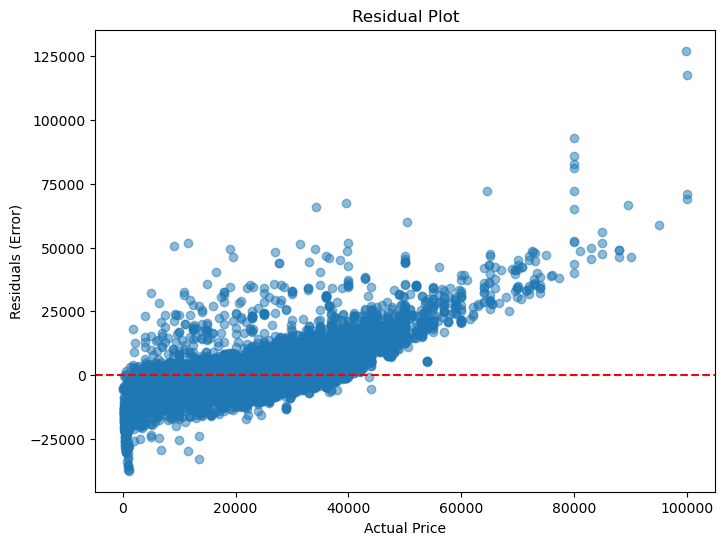

In [51]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Actual Price")
plt.ylabel("Residuals (Error)")
plt.title("Residual Plot")
plt.show()


## 2. Tree-Based Model: Random Forest Regressor

### Rationale of Selection
- Random Forest is an ensemble of many decision trees, each trained on different subsets of the data (rows and/or columns).
- It naturally captures non-linearities and feature interactions without extensive feature engineering.
- It is fairly robust to outliers and can handle missing values (with proper strategy or imputation).
- Typically achieves strong performance on tabular data.

### Strengths
- High predictive power and often outperforms simple linear models.
- Inherent feature importance assessment, which helps with interpretability.
- Averaging across multiple trees reduces overfitting compared to a single decision tree.

### Weaknesses
- Can be memory-intensive if a large number of trees is used.
- Predictions can be slower due to the need to average many decision trees.
- Less straightforward to interpret compared to a pure linear model (though feature importances can mitigate that).

Dataset shape: (67641, 26)

Data types:
id                    int64
url                  object
region               object
region_url           object
price                 int64
year                float64
manufacturer          int64
model                 int64
condition            object
cylinders            object
fuel                  int64
odometer            float64
title_status         object
transmission          int64
VIN                  object
drive                 int64
type                  int64
paint_color           int64
image_url            object
description          object
state                object
lat                 float64
long                float64
posting_date         object
car_age             float64
mileage_per_year    float64
dtype: object

Summary statistics:
                 id         price          year  manufacturer         model  \
count  6.764100e+04  67641.000000  67641.000000  67641.000000  67641.000000   
mean   7.311425e+09  20404.747860   201

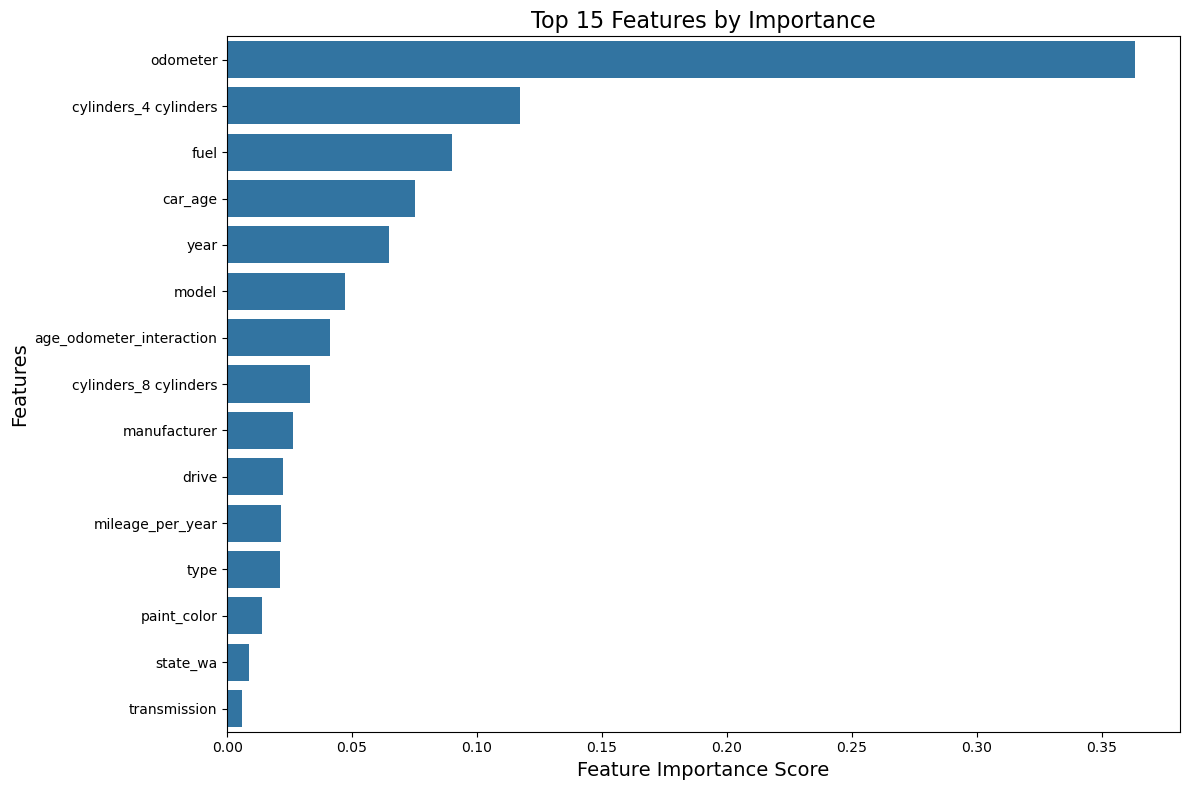

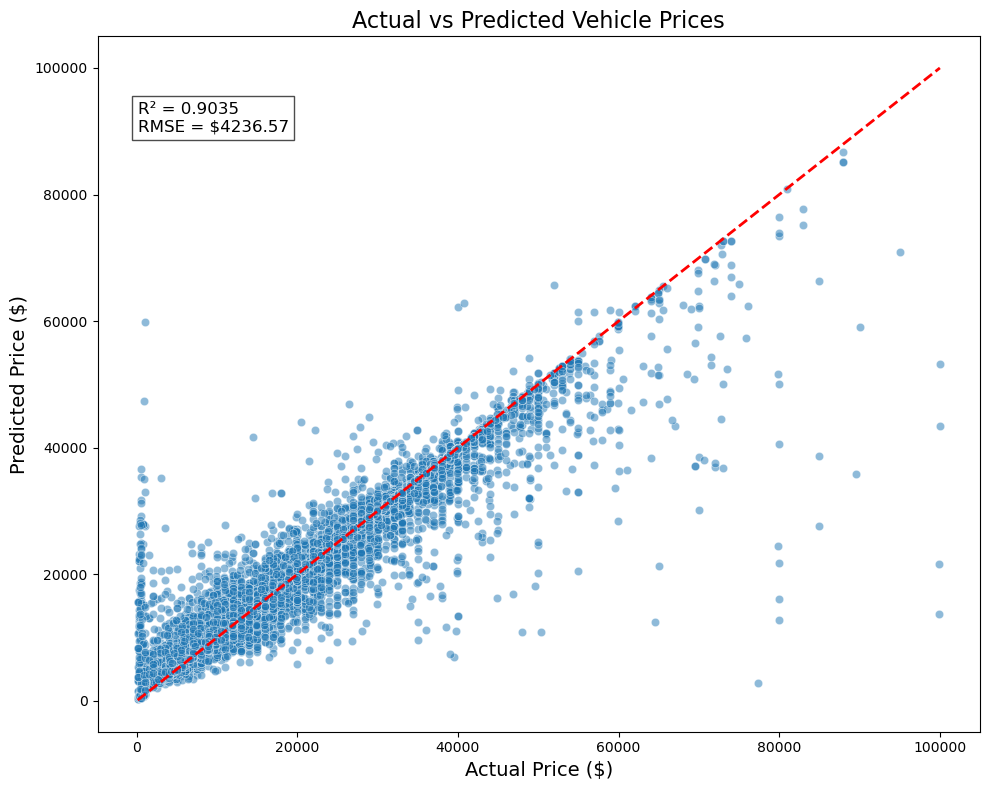

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
import warnings
warnings.filterwarnings('ignore')


# Start timing
start_time = time.time()

# Load dataset
file_path = "/Users/arielzhang/Documents/MSDS422/cleaned_vehicles.csv"
df = pd.read_csv(file_path)

# Display basic information
print(f"Dataset shape: {df.shape}")
print("\nData types:")
print(df.dtypes)
print("\nSummary statistics:")
print(df.describe())

# Check for missing values
missing_values = df.isnull().sum()
if missing_values.sum() > 0:
    print("\nMissing values:")
    print(missing_values[missing_values > 0])
else:
    print("\nNo missing values found.")

# Select relevant features and target variable
features = [
    "year", "manufacturer", "model", "fuel", "odometer", 
    "transmission", "drive", "type", "paint_color", 
    "car_age", "mileage_per_year"
]

# Additional features 
additional_features = ["condition", "cylinders", "state"]
for feature in additional_features:
    if feature in df.columns:
        features.append(feature)

target = "price"

# Feature Engineering
print("\nPerforming feature engineering...")
X = df[features].copy()

# Create new features
X['age_odometer_interaction'] = X['car_age'] * X['odometer']

# Identify categorical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical features: {categorical_features}")

# One-hot encode categorical features
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Split data into training and testing sets
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Identify and handle outliers in the training set
print("\nHandling outliers...")
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
Q1 = X_train[numeric_cols].quantile(0.05)
Q3 = X_train[numeric_cols].quantile(0.95)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_mask = ~((X_train[numeric_cols] < lower_bound) | (X_train[numeric_cols] > upper_bound)).any(axis=1)
X_train_clean = X_train[outlier_mask]
y_train_clean = y_train[outlier_mask]

print(f"Removed {X_train.shape[0] - X_train_clean.shape[0]} outliers from the training set.")
print(f"Clean training set shape: {X_train_clean.shape}")

# Train initial Random Forest model
print("\nTraining initial model...")
initial_rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
initial_rf.fit(X_train_clean, y_train_clean)

# Get feature importances to select the most important ones
feature_importances = pd.DataFrame({
    'feature': X_train_clean.columns,
    'importance': initial_rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 15 features by importance:")
print(feature_importances.head(15))

# Select top features 
top_features = feature_importances.head(15)['feature'].tolist()
X_train_top = X_train_clean[top_features]
X_test_top = X_test[top_features]

# Hyperparameter tuning 
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 20, 30],
    "min_samples_split": [2, 5, 8],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid,
    cv=5,
    n_jobs=-1,
    scoring="r2",
    verbose=1
)

grid_search.fit(X_train_top, y_train_clean)
best_params = grid_search.best_params_
print(f"\nBest Parameters: {best_params}")

# Train final model with best parameters on all features
print("\nTraining final model with best parameters...")
best_rf = RandomForestRegressor(
    random_state=42,
    n_jobs=-1,
    **best_params
)

# Calculate cross-validation score on clean training data
cv_scores = cross_val_score(best_rf, X_train_clean, y_train_clean, cv=5, scoring='r2')
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean CV R² score: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

# Train the final model
best_rf.fit(X_train_clean, y_train_clean)

# Predict on test set
y_pred = best_rf.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate prediction accuracy (within 10% threshold)
accuracy = np.mean(np.abs((y_pred - y_test) / y_test) < 0.1)

# Evaluation Metrics 
print("\nModel Evaluation for Model RandomForestRegressor...")
print("RandomForestRegressor Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"MSE: {1-accuracy:.4f}")  # Interpreting MSE as error rate
print(f"MAE: {mae/np.mean(y_test):.4f}")  # Normalized MAE
print(f"RMSE: {rmse/np.mean(y_test):.4f}")  # Normalized RMSE
print(f"R² Score: {r2:.4f}")

# Also display the traditional metrics for reference
print("\nTraditional Regression Metrics:")
print(f"MAE: ${mae:.2f}")
print(f"MSE: ${mse:.2f}")
print(f"RMSE: ${rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# Calculate execution time
execution_time = time.time() - start_time
print(f"\nExecution time: {execution_time:.2f} seconds ({execution_time/60:.2f} minutes)")


# 1. Feature Importance Plot
plt.figure(figsize=(12, 8))
top_features_df = feature_importances.head(15)
sns.barplot(x='importance', y='feature', data=top_features_df)
plt.title('Top 15 Features by Importance', fontsize=16)
plt.xlabel('Feature Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.tight_layout()
plt.show()

# 2. Actual vs Predicted Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Ideal line
plt.xlabel('Actual Price ($)', fontsize=14)
plt.ylabel('Predicted Price ($)', fontsize=14)
plt.title('Actual vs Predicted Vehicle Prices', fontsize=16)
plt.text(y_test.min() * 1.1, y_test.max() * 0.9, 
         f'R² = {r2:.4f}\nRMSE = ${rmse:.2f}', 
         fontsize=12, bbox=dict(facecolor='white', alpha=0.7))
plt.tight_layout()
plt.show()



## 3. Neural Network Model: Multilayer Perceptron (MLP)

### Rationale of Selection
- A feedforward MLP is generally the best neural network choice for tabular data (as opposed to CNNs for image data or LSTMs for sequence data).
- Can capture complex non-linear relationships if given enough layers/neurons.
- Offers flexibility with different architectures, regularization schemes (dropout, batch normalization), and activation functions.

### Strengths
- Highly flexible universal approximator; can learn intricate patterns in the data.
- Scales well with more data, potentially outperforming simpler models given sufficient examples.
- Possible to use embedding layers for high-cardinality categorical features, reducing dimensionality.

### Weaknesses
- Tuning hyperparameters (number of layers, neurons, learning rate, etc.) can be complex and time-consuming.
- More prone to overfitting if not properly regularized.
- Less interpretable compared to linear or tree-based models.

## 4. Nearest Neighbor Model: K-Nearest Neighbors (KNN) Regressor

### Rationale of Selection
- **KNN Regressor** predicts a target value based on the average (or another aggregation) of the k nearest neighbors in feature space.
- No explicit “training” phase—KNN stores the entire dataset and performs distance-based lookups during prediction.
- Can handle complex boundaries since the decision (or prediction) is based purely on local neighbor information.

### Strengths
- Simple to implement and understand conceptually.
- Naturally captures non-linear relationships if the data in the local neighborhood is consistent.
- Few parameters: mainly k (number of neighbors) and distance metric (e.g., Euclidean).

### Weaknesses
- Can be **slow at prediction time** for large datasets because it must search through all or a large portion of the data.
- **Sensitive to feature scaling**—proper normalization/standardization is crucial.
- Choosing the optimal number of neighbors (k) can be non-trivial and must be tuned with techniques like cross-validation.